# INDIVIDUAL PLANNING STAGE

In [1]:
#Code to prepare document
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv", na = c("", "NA"))

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
colSums(is.na(players))
summary(players)


experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

In [4]:
colSums(is.na(sessions))
summary(sessions)


hashedEmail          start_time            end_time original_start_time 
                  0                   0                   2                   0 
  original_end_time 
                  2

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

## Data Description


**Data Collection**

The data was collected by a Computer Science research group at the University of British Columbia (UBC) from a dedicated Minecraft server. The server records players' actions as they play. The dataset is provided in two separate files: players.csv, which contains information about each unique player, and sessions.csv, which contains records of individual play sessions. This data represents a specific sample of players who opted to join this particular research server and may not be representative of the entire Minecraft player base.

**players.csv Summary**

- Number of Observations: 196
- Number of Variables: 7

Variables:

experience: Player's self-reported experience level (e.g., 'Amateur', 'Veteran', 'Pro').

subscribe: True if the player subscribed to a newsletter, else False.

hashedEmail: A unique anonymized email for each player.

played_hours: Total number of hours played on the server.

name: The player's provided name.

gender: The player's self-identified gender.

Age: The player's age.

**sessions.csv Summary**

- Number of Observations: 1,535
- Number of Variables: 5

hashedEmail: The identifier linking the session to a player in the players.csv file.

start_time: The date and time when the play session started.

end_time: The date and time when the play session ended.

original_start_time: A timestamp for the session's start.

original_end_time: A timestampfor the session's end.

**Identified and Potential Data Issues**

Missing Values:

In players.csv, the Age column has 2 missing values (194 non-null out of 196).

In sessions.csv, end_time and original_end_time each have 2 missing values (1533 non-null out of 1535). 

Data Skew:

In players.csv, the mean (5.85 hours) is significantly larger than the median (0.10 hours), and the maximum value (223.10 hours) is very large compared to the majority of values. This suggests most players have played very little, while a few "power users" have played for a very long time.

Potential Biases:

The data is from a research-specific server. The players who joined may have different motivations or technical skills than normal gamers. Also, the experience variable is self-reported and subjective. A player's "Pro" might be another's "Regular". Also, the data only reflects activity on this server. Players may have experience in Minecraft elsewhere potentially making the played_hours and experience variables more unreliable as indicators of actual player skill or engagement with the game.

# Questions

**"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"**

In other words, **"Can a player's characteristics (specifically age, experience, and gender) combined with their play behaviors (such as session_count and avg_session_duration) be used to predict whether that player will subscribe to the newsletter?"**

In order to answer this question, we will need to make use of both the player.csv and session.csv to find out the behavior of users. The variables that will be helpful to solve this question is mentioned above, along with the subscribe variable.



# Exploratory Data Analysis and Visualization

In [5]:
# 1. Clean and aggregate sessions data
# - Drop rows with missing end_time
# - Convert time columns to datetime objects
# - Calculate duration in minutes
# - Group by player to get average duration and total session count
player_behavior <- sessions |>
    drop_na(end_time) |>
    mutate(
        start_dt = dmy_hm(start_time),
        end_dt = dmy_hm(end_time),
        duration_mins = as.numeric(difftime(end_dt, start_dt, units = "mins"))
    ) |>
    group_by(hashedEmail) |>
    summarise(
        avg_session_duration = mean(duration_mins),
        total_sessions = n()
    )

# 2. Join with players data
# - Replace NA values with 0 for players who had no sessions
tidy_data <- players |>
    left_join(player_behavior, by = "hashedEmail") |>
    mutate(
        avg_session_duration = replace_na(avg_session_duration, 0),
        total_sessions = replace_na(total_sessions, 0)
    )

# Check
tidy_data

experience,subscribe,hashedEmail,played_hours,name,gender,Age,avg_session_duration,total_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,74.77778,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,85.00000,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,5.00000,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57,5.00000,1
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,29.83333,6
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,15.00000,1


In [6]:
# Calculate means for quantitative columns
players %>%
  summarise(
    mean_age = mean(Age, na.rm = TRUE),
    mean_played_hours = mean(played_hours, na.rm = TRUE)
  )

mean_age,mean_played_hours
<dbl>,<dbl>
21.13918,5.845918


**Plot 1: Distribution of Player Age**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


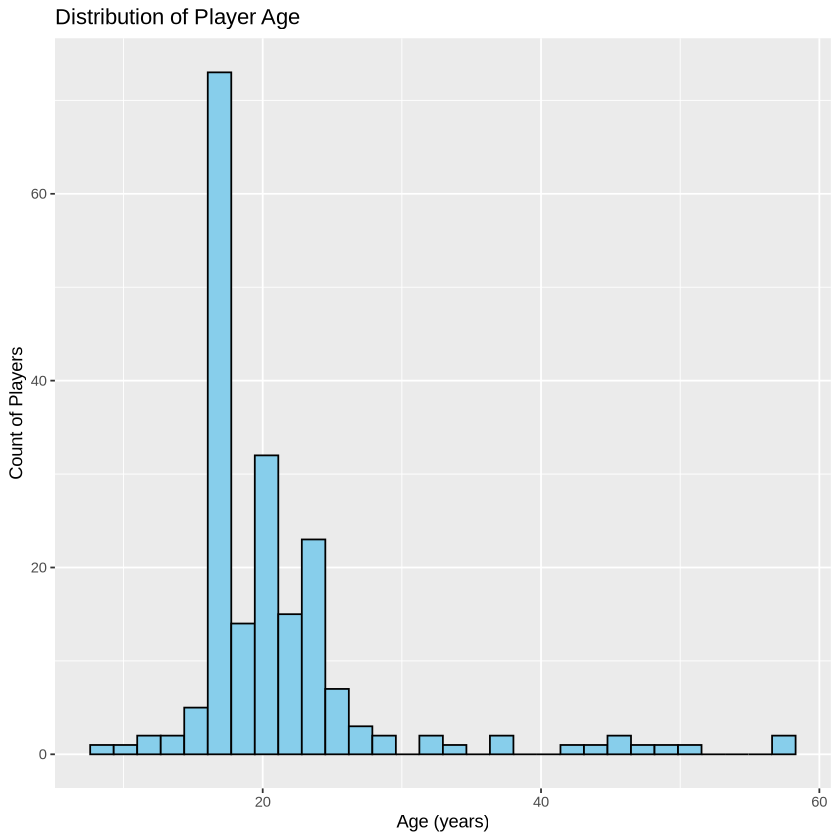

In [7]:
ggplot(tidy_data, aes(x = Age)) +
    geom_histogram(fill = "skyblue", color = "black") +
    labs(title = "Distribution of Player Age", 
        x = "Age (years)", 
        y = "Count of Players") 

In [8]:
This histogram shows us the age demographic of the player base. Most of the players are around 20 yo.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: This histogram
         ^


**Plot 2: Subscription Status**

In [ ]:
ggplot(tidy_data, aes(x = subscribe)) +
    geom_bar(fill = "orange", color = "black") +
    labs(title = "Count of Newsletter Subscribers", 
        x = "Subscribed?", 
        y = "Count")

This bar graph gives us insight on how many people are subscribed to the newsletter. Majority are.

**Plot 3: Age vs. Subscription Status**

In [ ]:
ggplot(tidy_data, aes(x = as.factor(subscribe), y = Age, fill = as.factor(subscribe))) +
  geom_boxplot() +
  labs(title = "Player Age by Subscription Status", 
       x = "Subscribed?", 
       y = "Age (years)",
       fill = "Subscribed")

This boxplot gives us insight on the age range of those who are subscribed or not. Younger people tend to subscribe.

**Plot 4: Average Session Duration vs. Subscription Status**

In [ ]:
ggplot(tidy_data, aes(x = subscribe, y = avg_session_duration, fill = subscribe)) +
    geom_boxplot() +
    labs(title = "Session Duration by Subscription Status", 
        x = "Subscribed?", 
        y = "Average Session Duration (mins)")

This boxplot gives us insight on which type of players are more engaged to the game. Those who subscribed are more engaged. 

# Methods and Plan

Using a Logistic Regression model should be good to address the question of predicting whether a player will subscribe to the newsletter.

Reasons:
- Gives a probablity between two options (binary)
- Compared to K-nn regression, you can give a better reason than simply "since all neighbors are subscribed, you are subscribed".
- Instead, "since this variable increased, your chance of being subscribed is increased/decreased by ??%".

Assumptions:
- Dependent variable is binary (subscription is)
- Every player is different (assume no alternate accounts)
- Relationship between age and played_hours, etc. is linear

Limitations:
- Results affected greatly by outliers
- If the 3rd assumption isn't true, this method will struggle

**Steps**

Evaluate the model using Precision and Recall, in addition to Accuracy, and select the model accordingly. Since there is a class imbalance (more subscribers), accuracy will not lead to the correct prediction.

First, split the data into 4 training sets (80%) and 1 testing set (20%). 

From sessions.csv, aggregate data to calculate avg_session_duration and total_sessions per player. Merge this aggregated data with players.csv.

Missing values in Age will be replaced with the median age, and missing values for session data (for players with 0 sessions) will be 0.

Age and played_hours will be standardized to make sure that variables with larger ranges don't dominate.

Categorical variables (experience, gender) will be given numerical values instead.

Finally, use 5-fold cross-validation on the Training set to tune the model before the final evaluation on the Test set.

**Github link:**

https://github.com/TW963/DSCI-100-individual/tree/main